First of all we start with importing all the necessary modules and libraries

In [1]:
!pip install greek-stemmer-pos
!pip install --upgrade smart_open gensim nltk
!pip install --upgrade preprocessing
!pip install torch numpy
!pip install gensim
!pip install pandas
!pip install urllib3
!pip install -U Jinja2
!pip install numpy==1.23.0
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 865.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: smart_open
    Found existing installation: smart-open 6.4.0
    Uninstalling smart-open-6.4.0:
      Successfully uninstalled smart-open-6.4.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathy 0.10.3 requires smart-open<7.0.0,>=5.2.1, but you have smart-open 7.0.1 which is incompatible.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
spacy 3.7.2 requires smart-open<7.0.0,>=5.2.1, but you have smart-open 7.0.1 which is 

Then we load the datasets

In [2]:
import pandas as pd


file_path = "/kaggle/input/ys19-2023-assignment-4a/train_set.csv"
valid_path = "/kaggle/input/ys19-2023-assignment-4a/valid_set.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

For the preprocessing, we only remove common stopwords and urls, this is because we will use the strip_accents_and_lowercase as defined in the greek BERT documentation to remove accents

The decision to not use stemmer was made since BERT recongizes the context of entire words in sentences

In [3]:
import re
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
valid['Text'] = valid['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
valid['Text'] = valid['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(remove_urls)


print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...   NEUTRAL  SYRIZA
1    9531  έξι νέες επιστολές τη μακεδονία «καίνε» τη νδ ...  NEGATIVE      ND
2   14146  ισχυρό κκε, δύναμη λαού στη βουλή στους καθημε...  POSITIVE     KKE
3   28716  @five2nds @anthi7vas μνημονιακότατο #μερα25 #ε...   NEUTRAL     KKE
4   32886  @ai_katerina αυτό είναι συγκλονιστικό είναι ψυ...   NEUTRAL  SYRIZA
5   12112  @tou_diaolou εχεις δίκιο, αντι να παιζει εαμ ε...  NEGATIVE  SYRIZA
6   13115                      προκλητικός όλα τσίπρας σκάι   POSITIVE  SYRIZA
7   21431  @ksyrizohunter θα πει "αλλιώς"; μητσοτακης δήλ...  POSITIVE      ND
8   12593  ράπισμα αντετοκούμπο υποκρισία μητσοτάκη: έξι ...  POSITIVE      ND
9   19725  @nikospappas16 @atsipras @kmitsotakis ξέρω του...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435  @glinard @teza_tereza @adonisgeorgiadi @atsipr

Save to csv



In [4]:
data.to_csv("data.csv", index=False)
valid.to_csv("valid.csv", index=False)

From now on we can get access to clean data in this way:

In [5]:
import pandas as pd
valid = pd.read_csv("/kaggle/working/valid.csv")
data = pd.read_csv("/kaggle/working/data.csv")

Use label encoder to encode Sentiments

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.fit_transform(valid['Sentiment'])

In [7]:
!pip install unicodedata

ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [8]:
import unicodedata

def strip_accents_and_lowercase(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn').lower()

accented_string = "Αυτή είναι η Ελληνική έκδοση του BERT."
unaccented_string = strip_accents_and_lowercase(accented_string)

print(unaccented_string) # αυτη ειναι η ελληνικη εκδοση του bert.


αυτη ειναι η ελληνικη εκδοση του bert.


Apply strip_accents_and_lowercase to Text column

In [9]:
data['Text'] = data['Text'].apply(strip_accents_and_lowercase)
valid['Text'] = valid['Text'].apply(strip_accents_and_lowercase)
data.head(10)

,New_ID,Text,Sentiment,Party
0,35027,#απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...,1,SYRIZA
1,9531,εξι νεες επιστολες τη μακεδονια «καινε» τη νδ ...,0,ND
2,14146,"ισχυρο κκε, δυναμη λαου στη βουλη στους καθημε...",2,KKE
3,28716,@five2nds @anthi7vas μνημονιακοτατο #μερα25 #ε...,1,KKE
4,32886,@ai_katerina αυτο ειναι συγκλονιστικο ειναι ψυ...,1,SYRIZA
5,12112,"@tou_diaolou εχεις δικιο, αντι να παιζει εαμ ε...",0,SYRIZA
6,13115,προκλητικος ολα τσιπρας σκαι,2,SYRIZA
7,21431,"@ksyrizohunter θα πει ""αλλιως""; μητσοτακης δηλ...",2,ND
8,12593,ραπισμα αντετοκουμπο υποκρισια μητσοτακη: εξι ...,2,ND
9,19725,@nikospappas16 @atsipras @kmitsotakis ξερω του...,2,ND


First approach with naive BERT classifier

In [10]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
tokenizer_distil = AutoTokenizer.from_pretrained("EftychiaKarav/DistilGREEK-BERT")
model = AutoModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/454M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [11]:
def tokenize_text(text, tokenizer):
    tokens = tokenizer.tokenize(text)
    return tokens

data['Tokens'] = data['Text'].apply(lambda x: tokenize_text(x, tokenizer))
data['Tokens_distil'] = data['Text'].apply(lambda x: tokenize_text(x, tokenizer_distil))
max_len = data['Tokens'].apply(len).max()
max_len_distil = data['Tokens_distil'].apply(len).max()
print(max_len)
print(max_len_distil)

154
154


In [12]:
def encode_and_pad(text, tokenizer, max_length):
    # Using encode_plus to get the encoded text
    encoding = tokenizer.encode_plus(
        text,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )
    # Squeeze the tensor to remove the batch dimension
    input_ids = encoding['input_ids'].squeeze(0)
    attention_mask = encoding['attention_mask'].squeeze(0)
    return input_ids, attention_mask

data[['TokenIDs_padded', 'Attention_mask']] = data['Text'].apply(lambda x: encode_and_pad(x, tokenizer, max_len)).apply(pd.Series)
valid[['TokenIDs_padded', 'Attention_mask']] = valid['Text'].apply(lambda x: encode_and_pad(x, tokenizer, max_len)).apply(pd.Series)
data[['TokenIDs_padded_distil', 'Attention_mask_distil']] = data['Text'].apply(lambda x: encode_and_pad(x, tokenizer_distil, max_len_distil)).apply(pd.Series)
valid[['TokenIDs_padded_distil', 'Attention_mask_distil']] = valid['Text'].apply(lambda x: encode_and_pad(x, tokenizer_distil, max_len_distil)).apply(pd.Series)

In [13]:
data.head(10)

,New_ID,Text,Sentiment,Party,Tokens,Tokens_distil,TokenIDs_padded,Attention_mask,TokenIDs_padded_distil,Attention_mask_distil
0,35027,#απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...,1,SYRIZA,"[#, απολυμανση, _, κορ, ##ιοι, #, απε, ##ντο, ...","[#, απολυμανση, _, κορ, ##ιοι, #, απε, ##ντο, ...","[tensor(101), tensor(110), tensor(24023), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(110), tensor(24023), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
1,9531,εξι νεες επιστολες τη μακεδονια «καινε» τη νδ ...,0,ND,"[εξι, νεες, επιστολες, τη, μακεδονια, «, και, ...","[εξι, νεες, επιστολες, τη, μακεδονια, «, και, ...","[tensor(101), tensor(1341), tensor(936), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(1341), tensor(936), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
2,14146,"ισχυρο κκε, δυναμη λαου στη βουλη στους καθημε...",2,KKE,"[ισχυρο, κκε, ,, δυναμη, λαου, στη, βουλη, στο...","[ισχυρο, κκε, ,, δυναμη, λαου, στη, βουλη, στο...","[tensor(101), tensor(2857), tensor(2545), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(2857), tensor(2545), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
3,28716,@five2nds @anthi7vas μνημονιακοτατο #μερα25 #ε...,1,KKE,"[@, fi, ##ve, ##2, ##nd, ##s, @, ant, ##hi, ##...","[@, fi, ##ve, ##2, ##nd, ##s, @, ant, ##hi, ##...","[tensor(101), tensor(149), tensor(2656), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(2656), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
4,32886,@ai_katerina αυτο ειναι συγκλονιστικο ειναι ψυ...,1,SYRIZA,"[@, ai, _, kate, ##rin, ##a, αυτο, ειναι, συγκ...","[@, ai, _, kate, ##rin, ##a, αυτο, ειναι, συγκ...","[tensor(101), tensor(149), tensor(18220), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(18220), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
5,12112,"@tou_diaolou εχεις δικιο, αντι να παιζει εαμ ε...",0,SYRIZA,"[@, tou, _, dia, ##olo, ##u, εχεις, δικιο, ,, ...","[@, tou, _, dia, ##olo, ##u, εχεις, δικιο, ,, ...","[tensor(101), tensor(149), tensor(16528), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(16528), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
6,13115,προκλητικος ολα τσιπρας σκαι,2,SYRIZA,"[προκλητικο, ##ς, ολα, τσιπρας, σκαι]","[προκλητικο, ##ς, ολα, τσιπρας, σκαι]","[tensor(101), tensor(18157), tensor(278), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(18157), tensor(278), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
7,21431,"@ksyrizohunter θα πει ""αλλιως""; μητσοτακης δηλ...",2,ND,"[@, k, ##sy, ##riz, ##oh, ##unt, ##er, θα, πει...","[@, k, ##sy, ##riz, ##oh, ##unt, ##er, θα, πει...","[tensor(101), tensor(149), tensor(166), tensor...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(166), tensor...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
8,12593,ραπισμα αντετοκουμπο υποκρισια μητσοτακη: εξι ...,2,ND,"[ραπ, ##ισμα, αντε, ##το, ##κου, ##μπο, υποκρι...","[ραπ, ##ισμα, αντε, ##το, ##κου, ##μπο, υποκρι...","[tensor(101), tensor(12338), tensor(5826), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(12338), tensor(5826), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
9,19725,@nikospappas16 @atsipras @kmitsotakis ξερω του...,2,ND,"[@, ni, ##kos, ##pa, ##pp, ##as, ##16, @, at, ...","[@, ni, ##kos, ##pa, ##pp, ##as, ##16, @, at, ...","[tensor(101), tensor(149), tensor(5863), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(5863), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."


In [14]:
valid.head(10)

,New_ID,Text,Sentiment,Party,TokenIDs_padded,Attention_mask,TokenIDs_padded_distil,Attention_mask_distil
0,435,@glinard @teza_tereza @adonisgeorgiadi @atsipr...,2,SYRIZA,"[tensor(101), tensor(149), tensor(8864), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(8864), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
1,3061,τσιπρας: ζητησαμε απο αντιπολιτευση να συμμετε...,0,SYRIZA,"[tensor(101), tensor(2209), tensor(143), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(2209), tensor(143), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
2,2161,"σωστος ελληνας, δημοκρατης, ελληνας εξωτερικου...",0,ND,"[tensor(101), tensor(2334), tensor(278), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(2334), tensor(278), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
3,1271,@30__kai ναι βλεπεις αυτα ενδιαφερουν τους μητ...,2,ND,"[tensor(101), tensor(149), tensor(472), tensor...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(472), tensor...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
4,4396,συνεντευξη μητσοτακη alpha: υπο αιρεση 13η συν...,1,ND,"[tensor(101), tensor(1535), tensor(6322), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(1535), tensor(6322), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
5,1102,εκλογικο περιπτερο συριζα - προοδευτικη συμμαχ...,2,SYRIZA,"[tensor(101), tensor(9479), tensor(9046), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(9479), tensor(9046), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
6,1567,επιτακτικη αναγκη τη κυβερνηση κ. μητσοτακη κα...,2,ELL_LYSI,"[tensor(101), tensor(15785), tensor(828), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(15785), tensor(828), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
7,4093,times λονδινου τσιπρα: πως απο λαικιστης σωτηρ...,1,SYRIZA,"[tensor(101), tensor(9491), tensor(7005), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(9491), tensor(7005), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
8,3026,@dimi_zaharakis @sspithess παντως να ξερεις συ...,0,ND,"[tensor(101), tensor(149), tensor(19868), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(19868), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
9,2473,@manosvoularinos εμετικο!!! στη νδ να βλεπουν ...,0,ND,"[tensor(101), tensor(149), tensor(3235), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(101), tensor(149), tensor(3235), tenso...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."


In [15]:
import torch

sentiment_tensor = torch.tensor(data['Sentiment'].astype(int).values)
valid_sentiment_tensor = torch.tensor(valid['Sentiment'].astype(int).values)
sentiment_tensor

tensor([1, 0, 2,  ..., 1, 0, 1])

In [16]:
from torch.utils.data import TensorDataset

# Stacking the individual tensors in 'TokenIDs_padded' and 'Attention_mask' into a single tensor
token_ids_padded = torch.stack(data['TokenIDs_padded'].tolist())
attention_masks = torch.stack(data['Attention_mask'].tolist())
token_ids_padded_distil = torch.stack(data['TokenIDs_padded_distil'].tolist())
attention_masks_distil = torch.stack(data['Attention_mask_distil'].tolist())
sentiment_tensor = torch.tensor(data['Sentiment'].values)

# Do the same for the validation set
valid_token_ids_padded = torch.stack(valid['TokenIDs_padded'].tolist())
valid_attention_masks = torch.stack(valid['Attention_mask'].tolist())
valid_token_ids_padded_distil = torch.stack(valid['TokenIDs_padded_distil'].tolist())
valid_attention_masks_distil = torch.stack(valid['Attention_mask_distil'].tolist())
valid_sentiment_tensor = torch.tensor(valid['Sentiment'].values)


train_dataset = TensorDataset(token_ids_padded, attention_masks, sentiment_tensor)
valid_dataset = TensorDataset(valid_token_ids_padded, valid_attention_masks, valid_sentiment_tensor)
train_dataset_distil = TensorDataset(token_ids_padded_distil, attention_masks_distil, sentiment_tensor)
valid_dataset_distil = TensorDataset(valid_token_ids_padded_distil, valid_attention_masks_distil, valid_sentiment_tensor)

Create DataLoaders

In [17]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
validation_dataloader = DataLoader(
            valid_dataset, # The validation samples.
            sampler = SequentialSampler(valid_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
)

The simple BERT based on the HuggingFace documentation

In [18]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "nlpaueb/bert-base-greek-uncased-v1", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = True, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)
model.cuda()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [19]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (35000, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [20]:
from transformers import AdamW

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


The next two cells are based on the tutorial posted on piazza

In [21]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))



In [22]:
import random
import numpy as np

if False : 
    seed_val = 42
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    # For each epoch...
    for epoch_i in range(0, epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the 
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        

            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)

            loss = outputs.loss
            logits = outputs.logits

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)

                loss = outputs.loss
                logits = outputs.logits

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)


        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

Optuna for this simple model

In [23]:
import optuna
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from transformers import BertForSequenceClassification

#epochs = 2
#model = BertForSequenceClassification.from_pretrained(
#    "nlpaueb/bert-base-greek-uncased-v1", # Use the 12-layer BERT model, with an uncased vocab.
#    num_labels = 3, # The number of output labels--2 for binary classification.
#                    # You can increase this for multi-class tasks.   
#    output_attentions = True, # Whether the model returns attentions weights.
#    output_hidden_states = True, # Whether the model returns all hidden-states.
#)

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset, batch_size=batch_size)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Collect predictions and true labels for each batch
            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        # Calculate F1 score
        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        # Optuna maximizes the returned value
        return f1
    

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
#    print("    {}: {}".format(key, value))

Create a more complex model based on BERT using a wrapper class for the classifier

In [24]:
import torch.nn as nn
import optuna
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden = nn.Linear(self.bert.config.hidden_size, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        self.hidden.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)
        self.classifier.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits


In [25]:
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import optuna 

epochs = 2
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    hidden_size = trial.suggest_categorical("hidden_size", [768, 512, 256])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    activation_function = trial.suggest_categorical("activation_function", ["relu", "gelu", "tanh", "leaky_relu"])
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Initialize the custom model
    model = BertClassifier(
            "nlpaueb/bert-base-greek-uncased-v1", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
    )    
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            # Adjust the model call according to the new signature
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, b_labels)
            loss.backward()
            optimizer.step()

        # Validation loop, largely remains the same
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        return f1

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
#    print("    {}: {}".format(key, value))

DISTIL

In [26]:
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from transformers import DistilBertModel, DistilBertConfig

import torch.nn as nn
import optuna

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        # Use the hidden size from DistilBert config if not overriding
        self.hidden = nn.Linear(self.distilbert.config.dim, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        # Adjust initialization as needed
        nn.init.normal_(self.hidden.weight, mean=0.0, std=self.distilbert.config.initializer_range)
        nn.init.normal_(self.classifier.weight, mean=0.0, std=self.distilbert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # Taking the first token (CLS token) representation
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits

epochs = 2
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    hidden_size = trial.suggest_categorical("hidden_size", [768, 512, 256])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    activation_function = trial.suggest_categorical("activation_function", ["relu", "gelu", "tanh", "leaky_relu"])
    
    train_dataloader = DataLoader(train_dataset_distil, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset_distil, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Initialize the custom model
    model = BertClassifier(
            "EftychiaKarav/DistilGREEK-BERT", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
    )    
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            # Adjust the model call according to the new signature
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, b_labels)
            loss.backward()
            optimizer.step()

        # Validation loop, largely remains the same
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        return f1

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
    #print("    {}: {}".format(key, value))

Since the results where not good, we will try to narrow down the hyperparameters based on the results we found so far

In [27]:
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from transformers import DistilBertModel, DistilBertConfig


import torch.nn as nn
import optuna

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        # Use the hidden size from DistilBert config if not overriding
        self.hidden = nn.Linear(self.distilbert.config.dim, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        # Adjust initialization as needed
        nn.init.normal_(self.hidden.weight, mean=0.0, std=self.distilbert.config.initializer_range)
        nn.init.normal_(self.classifier.weight, mean=0.0, std=self.distilbert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # Taking the first token (CLS token) representation
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits


epochs = 2
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 8e-6, 2e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 632])
    hidden_size = trial.suggest_categorical("hidden_size", [384, 512, 640])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.25)
    activation_function = trial.suggest_categorical("activation_function", ["relu", "gelu", "tanh"])
    
    train_dataloader = DataLoader(train_dataset_distil, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset_distil, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Initialize the custom model
    model = BertClassifier(
            "EftychiaKarav/DistilGREEK-BERT", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
    )    
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            # Adjust the model call according to the new signature
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, b_labels)
            loss.backward()
            optimizer.step()

        # Validation loop, largely remains the same
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        return f1

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
#    print("    {}: {}".format(key, value))

For the Greek BERT model wrapper narrow down the values pool

In [28]:
import torch.nn as nn
import optuna
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden = nn.Linear(self.bert.config.hidden_size, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        self.hidden.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)
        self.classifier.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits

    
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import optuna 

epochs = 2
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 8e-6, 1.5e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 24, 32])
    hidden_size = trial.suggest_categorical("hidden_size", [512, 640, 768])
    dropout_rate = trial.suggest_float("dropout_rate", 0.15, 0.2)
    activation_function = trial.suggest_categorical("activation_function", ["relu", "tanh"])

    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Initialize the custom model
    model = BertClassifier(
            "nlpaueb/bert-base-greek-uncased-v1", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
    )    
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            # Adjust the model call according to the new signature
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, b_labels)
            loss.backward()
            optimizer.step()

        # Validation loop, largely remains the same
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        return f1

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
#    print("    {}: {}".format(key, value))

In [29]:
#optuna.visualization.plot_optimization_history(study)


In [30]:
#optuna.visualization.plot_parallel_coordinate(study)


In [31]:
#optuna.visualization.plot_slice(study)


In [32]:
#optuna.visualization.plot_param_importances(study)


Since the most important hyperparameter by far is learnign rate, we will create another optuna study that just experiments with epochs and learning rate

In [33]:
import torch.nn as nn
import optuna
from transformers import BertModel
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

batch_size = 16
hidden_size = 256
dropout_rate = 0.17450016248069433
activation_function ='tanh'

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden = nn.Linear(self.bert.config.hidden_size, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        self.hidden.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)
        self.classifier.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits

    
from transformers import BertModel
import optuna 

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-5, log=True)
    epochs = trial.suggest_int("epochs",2,5)
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Initialize the custom model
    model = BertClassifier(
            "nlpaueb/bert-base-greek-uncased-v1", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
    )    
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            optimizer.zero_grad()
            # Adjust the model call according to the new signature
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, b_labels)
            loss.backward()
            optimizer.step()

        # Validation loop, largely remains the same
        model.eval()
        predictions, true_labels = [], []
        for batch in validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with torch.no_grad():
                outputs = model(b_input_ids, attention_mask=b_input_mask)

            logits = outputs
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            predictions.append(np.argmax(logits, axis=1).flatten())
            true_labels.append(label_ids.flatten())

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)
        f1 = f1_score(true_labels, predictions, average='weighted')
        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        accuracy = accuracy_score(true_labels, predictions)

        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("accuracy", accuracy)

        return f1

#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=20)

# Best trial results
#best_trial = study.best_trial
#print("Best trial:")
#print("  F1 Score: ", best_trial.value)
#print("  Precision: ", best_trial.user_attrs["precision"])
#print("  Recall: ", best_trial.user_attrs["recall"])
#print("  Accuracy: ", best_trial.user_attrs["accuracy"])
#print("  Params: ")
#for key, value in best_trial.params.items():
#    print("    {}: {}".format(key, value))

Plot curves based on the best trial

In [34]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from numpy import interp
from transformers import BertModel
import torch.nn as nn
import torch.optim

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden = nn.Linear(self.bert.config.hidden_size, hidden_size)
        

        self.activation = nn.Tanh()

        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        self.hidden.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)
        self.classifier.weight.data.normal_(mean=0.0, std=self.bert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits

epochs = 2
learning_rate = 1.7526138202840862e-05
batch_size = 16
hidden_size = 256
dropout_rate = 0.17450016248069433

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the custom model
model = BertClassifier(
        "nlpaueb/bert-base-greek-uncased-v1", 
        num_labels=3, 
        hidden_size=hidden_size, 
        dropout_rate=dropout_rate
)    
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_set = []
valid_accuracy_set = []
valid_loss_set = []
roc_auc_list = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        optimizer.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(outputs, b_labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = train_loss / len(train_dataloader)
    train_loss_set.append(avg_train_loss)

    # Validation
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    predictions, true_labels = [], []

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask)

        logits = outputs
        loss = loss_fn(logits, b_labels)
        eval_loss += loss.item()
        predictions.append(logits.detach().cpu().numpy())
        true_labels.append(b_labels.to('cpu').numpy())
    
    avg_val_loss = eval_loss / len(validation_dataloader)
    valid_loss_set.append(avg_val_loss)

    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    # Convert the predictions and labels to binary format for ROC calculation
    binarized_labels = label_binarize(true_labels, classes=[0, 1, 2])
    if binarized_labels.shape[1] == 2:  # Binary case
        binarized_predictions = np.argmax(predictions, axis=1)
    else:  # Multi-class case
        binarized_predictions = label_binarize(np.argmax(predictions, axis=1), classes=[0, 1, 2])

    f1 = f1_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
    precision = precision_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
    recall = recall_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
    accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
    
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {avg_train_loss}")
    print(f"Validation Loss: {avg_val_loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

Epoch 1/2
Training Loss: 1.085459895607686
Validation Loss: 1.0773121730996928
Accuracy: 0.39392201834862384
Precision: 0.4459472594348045
Recall: 0.39392201834862384
F1 Score: 0.34523704618974443
Epoch 2/2
Training Loss: 1.0510407970461784
Validation Loss: 1.0472852235904893
Accuracy: 0.4151376146788991
Precision: 0.4640636105874221
Recall: 0.4151376146788991
F1 Score: 0.3922398411402816


Learning Curve

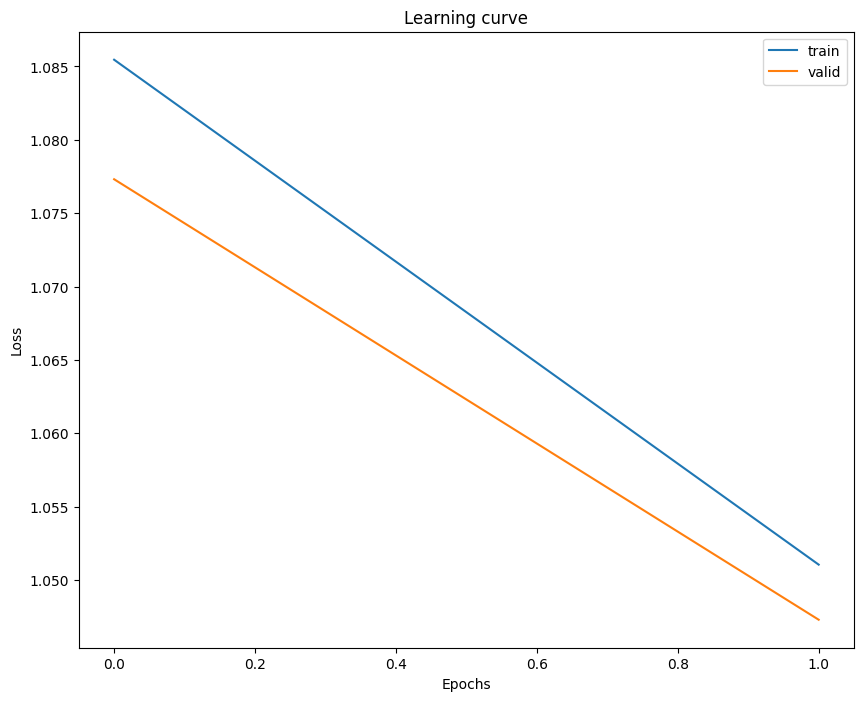

In [35]:
plt.figure(figsize=(10, 8))
plt.title("Learning curve")
plt.plot(train_loss_set, label='train')
plt.plot(valid_loss_set, label='valid')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

ROC curve

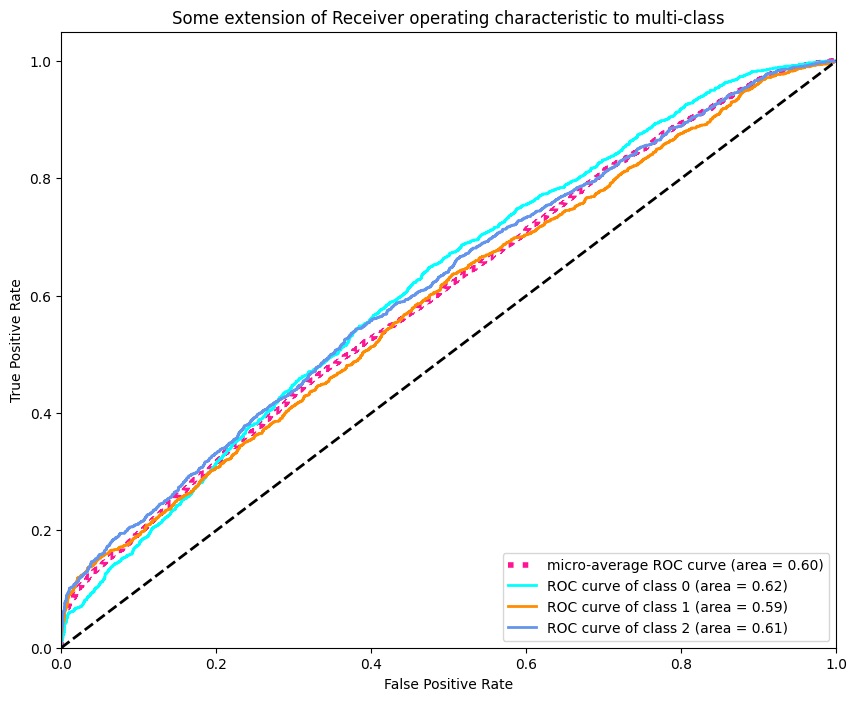

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from numpy import interp
from itertools import cycle

# Binarize the output labels if not already done
n_classes = 3  # Adjust this based on your dataset
y_test = label_binarize(true_labels, classes=[0, 1, 2])
y_score = predictions  # Assuming predictions are already obtained from the model

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
lw = 2  # Line width
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

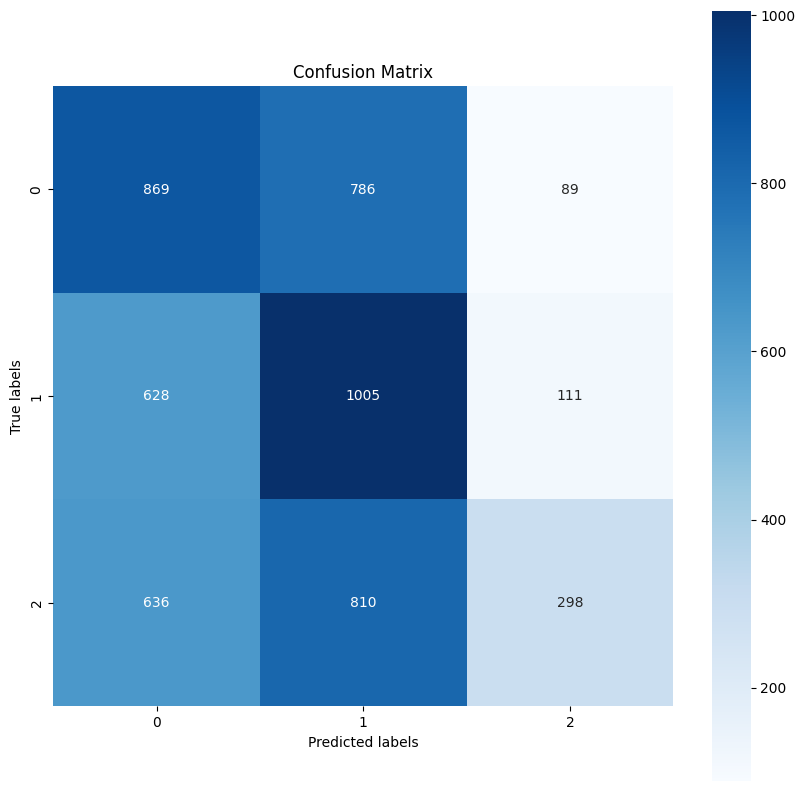

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predictions to the same format as true_labels if necessary
pred_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues", square=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
tick_marks = np.arange(len(set(true_labels)))  # Assuming your labels are 0-indexed
ax.set_xticks(tick_marks + 0.5)
ax.set_xticklabels(range(len(set(true_labels))))
ax.set_yticks(tick_marks + 0.5)
ax.set_yticklabels(range(len(set(true_labels))))
plt.show()


Prepare the test set

In [38]:
test_set = pd.read_csv("/kaggle/input/ys19-2023-assignment-4a/test_set.csv")
test_set['Text'] = test_set['Text'].apply(lambda x: x.lower())
test_set['Text'] = test_set['Text'].apply(remove_stopwords)
test_set['Text'] = test_set['Text'].apply(remove_urls)
test_set['Text'] = test_set['Text'].apply(strip_accents_and_lowercase)
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
test_set['Tokens'] = test_set['Text'].apply(lambda x: tokenize_text(x, tokenizer))
max_len = test_set['Tokens'].apply(len).max()
test_set[['TokenIDs_padded', 'Attention_mask']] = test_set['Text'].apply(lambda x: encode_and_pad(x, tokenizer, max_len)).apply(pd.Series)
token_ids_padded_test = torch.stack(test_set['TokenIDs_padded'].tolist())
attention_masks_test = torch.stack(test_set['Attention_mask'].tolist())

Create concatenated dataset

In [39]:
concatenated_ids = torch.cat((token_ids_padded, valid_token_ids_padded), dim=0)
concatenated_masks = torch.cat((attention_masks, valid_attention_masks), dim=0)
concatenated_tensors = torch.cat((sentiment_tensor, valid_sentiment_tensor), dim=0)
concatenated_dataset = TensorDataset(concatenated_ids, concatenated_masks, concatenated_tensors)

epochs = 2
learning_rate = 1.7526138202840862e-05
batch_size = 16
hidden_size = 256
dropout_rate = 0.17450016248069433

concatenated_dataloader = DataLoader(concatenated_dataset, batch_size=batch_size, shuffle=True)


Create the model

In [40]:
# Initialize the model
model = BertClassifier(
    "nlpaueb/bert-base-greek-uncased-v1",
    num_labels=3,
    hidden_size=hidden_size,
    dropout_rate=dropout_rate
)
model.to(device)

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = 0
    for batch in concatenated_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(outputs, b_labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(concatenated_dataloader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")



Epoch 1/2, Loss: 1.082296067719975
Epoch 2/2, Loss: 1.042201931667


Predictions

In [41]:
test_dataset = TensorDataset(token_ids_padded_test, attention_masks_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size) 
model.eval()  # Set the model to evaluation mode
predictions = []  # Store predictions here
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)  # Move batch to device (CPU or GPU)
    b_input_ids, b_attention_mask = batch
    
    with torch.no_grad():  # Temporarily set all the requires_grad flag to false
        outputs = model(b_input_ids, attention_mask=b_attention_mask)
        logits = outputs
    
    logits = logits.detach().cpu().numpy()  # Move logits to CPU and convert to numpy array
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)
predicted_classes = np.argmax(predictions, axis=1) 

In [42]:
predicted_classes

array([2, 2, 2, ..., 0, 0, 0])

In [43]:
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
string_labels = [label_mapping[label] for label in predicted_classes]
result_df = pd.DataFrame({ 'Id' : test_set['New_ID'],'Predicted': string_labels})
result_df

,Id,Predicted
0,1,POSITIVE
1,2,POSITIVE
2,3,POSITIVE
3,4,NEUTRAL
4,5,POSITIVE
...,...,...
10465,10466,NEGATIVE
10466,10467,NEUTRAL
10467,10468,NEGATIVE
10468,10469,NEGATIVE


In [44]:
result_df.to_csv("submission.csv", index=False)

Same procedure but for distil

In [45]:
learning_rate= 1.525057541628784e-05
batch_size = 64
hidden_size = 512
dropout_rate = 0.49831817398331124
activation_function = 'tanh'

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, hidden_size=768, dropout_rate=0.1, activation_function='relu'):
        super(BertClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained(bert_model_name)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        # Use the hidden size from DistilBert config if not overriding
        self.hidden = nn.Linear(self.distilbert.config.dim, hidden_size)
        
        # Initialize activation function based on the input argument
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'gelu':
            self.activation = nn.GELU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Unsupported activation function specified")
        
        self.classifier = nn.Linear(hidden_size, num_labels)
        self.init_weights()

    def init_weights(self):
        # Adjust initialization as needed
        nn.init.normal_(self.hidden.weight, mean=0.0, std=self.distilbert.config.initializer_range)
        nn.init.normal_(self.classifier.weight, mean=0.0, std=self.distilbert.config.initializer_range)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # Taking the first token (CLS token) representation
        cls_output = self.dropout(cls_output)
        hidden_output = self.hidden(cls_output)
        activation_output = self.activation(hidden_output)
        logits = self.classifier(activation_output)
        
        return logits


model = BertClassifier(
            "EftychiaKarav/DistilGREEK-BERT", 
            num_labels=3, 
            hidden_size=hidden_size, 
            dropout_rate=dropout_rate, 
            activation_function=activation_function
)  
model.to(device)

config.json:   0%|          | 0.00/540 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/282M [00:00<?, ?B/s]

BertClassifier(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Li

In [46]:
concatenated_ids = torch.cat((token_ids_padded_distil, valid_token_ids_padded_distil), dim=0)
concatenated_masks = torch.cat((attention_masks_distil, valid_attention_masks_distil), dim=0)
concatenated_tensors = torch.cat((sentiment_tensor, valid_sentiment_tensor), dim=0)
concatenated_dataset = TensorDataset(concatenated_ids, concatenated_masks, concatenated_tensors)

concatenated_dataloader = DataLoader(concatenated_dataset, batch_size=batch_size, shuffle=True)

In [47]:
tokenizer = AutoTokenizer.from_pretrained("EftychiaKarav/DistilGREEK-BERT")
test_set['Tokens_distil'] = test_set['Text'].apply(lambda x: tokenize_text(x, tokenizer))
max_len = test_set['Tokens_distil'].apply(len).max()
test_set[['TokenIDs_padded_distil', 'Attention_mask_distil']] = test_set['Text'].apply(lambda x: encode_and_pad(x, tokenizer, max_len)).apply(pd.Series)
token_ids_padded_test = torch.stack(test_set['TokenIDs_padded_distil'].tolist())
attention_masks_test = torch.stack(test_set['Attention_mask_distil'].tolist())

In [48]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = 0
    for batch in concatenated_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(outputs, b_labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(concatenated_dataloader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")



Epoch 1/2, Loss: 1.1045150998894495
Epoch 2/2, Loss: 1.098499444422831


In [49]:
test_dataset = TensorDataset(token_ids_padded_test, attention_masks_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size) 
model.eval()  # Set the model to evaluation mode
predictions = []  # Store predictions here
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)  # Move batch to device (CPU or GPU)
    b_input_ids, b_attention_mask = batch
    
    with torch.no_grad():  # Temporarily set all the requires_grad flag to false
        outputs = model(b_input_ids, attention_mask=b_attention_mask)
        logits = outputs
    
    logits = logits.detach().cpu().numpy()  # Move logits to CPU and convert to numpy array
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)
predicted_classes = np.argmax(predictions, axis=1) 

In [50]:
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
string_labels = [label_mapping[label] for label in predicted_classes]
result_df = pd.DataFrame({ 'Id' : test_set['New_ID'],'Predicted': string_labels})
result_df

,Id,Predicted
0,1,NEUTRAL
1,2,POSITIVE
2,3,POSITIVE
3,4,NEUTRAL
4,5,POSITIVE
...,...,...
10465,10466,NEGATIVE
10466,10467,NEUTRAL
10467,10468,NEGATIVE
10468,10469,POSITIVE


In [51]:
result_df.to_csv("distil_output.csv", index=False)